# Exercise -  Seasonal temperatures

## Steps:
1. Read the 'helsinki.csv' into a pandas dataframe
1. Selected the data from 1953-2016, that is from january to december 2016
1. Store in four variables (`winter`, `spring`, `summer`, `fall`) the rows corresponding to he following criteria
    - `winter` Months from December to February
    - `spring` Months from March to May
    - `summer` Months from June to August
    - `fall` Months from September to November
    
1. Create four dataframes called `winter_agg`, `spring_agg`, `summer_agg`, `fall_agg`. Each should contain the yearly mean
temperature of the `Diff`temperatures from season.
1. Create four plots, one for each season, labeling axes accordingly. Try to incorporate gridlines and line legends

In [1]:
#importing needed libraries
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
#variable declaration
#saving the csv´s name in a variavle
fname = 'helsinki.csv'
#getting the dataframe
data = pd.read_csv(fname)

In [3]:
data.head()

,DATE_m,TAVG,temp_celsius,Month,ref_temp,Diff
0,195201,29.478,-1.401,1,-5.351,3.950
1,195202,24.800,-4.000,2,-5.941,1.941
2,195203,13.808,-10.107,3,-2.440,-7.666
3,195204,39.607,4.226,4,3.424,0.802
4,195205,44.667,7.037,5,10.180,-3.143


### Selected the data from 1953-2016, that is from january to december 2016

In [4]:
#filtering the data using loc
select_data = data.loc[(data['DATE_m'] >= 195301) & (data['DATE_m'] <=201612)]
#converting into string the column 'DATE_m' to be to make a slice
select_data['DATE_m'] = select_data['DATE_m'].astype('str')

C:\Users\jeorv\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
#getting the year by using slice
select_data['year'] = select_data['DATE_m'].str.slice(start=0,stop=4)
select_data

C:\Users\jeorv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DATE_m,TAVG,temp_celsius,Month,ref_temp,Diff,year
12,195301,22.286,-5.397,1,-5.351,-0.046,1953
13,195302,16.407,-8.663,2,-5.941,-2.721,1953
14,195303,31.130,-0.483,3,-2.440,1.957,1953
15,195304,39.963,4.424,4,3.424,1.000,1953
16,195305,48.677,9.265,5,10.180,-0.915,1953
17,195306,62.667,17.037,6,14.668,2.369,1953
18,195307,62.720,17.067,7,17.281,-0.214,1953
19,195308,59.207,15.115,8,15.604,-0.489,1953
20,195309,49.370,9.650,9,10.596,-0.946,1953
21,195310,45.000,7.222,10,5.488,1.734,1953


In [6]:
#filtering the data into the seasons and saving in variables
winter = select_data.loc[(select_data['Month'] <= 2) | (select_data['Month'] == 12)]
spring = select_data.loc[(select_data['Month'] == 3) | (select_data['Month'] == 4 )]
summer = select_data.loc[(select_data['Month'] >= 6) & (select_data['Month'] <= 8)]
fall = select_data.loc[(select_data['Month'] >= 9) & (select_data['Month'] <= 11)]

In [7]:
# Group the data bases by year, because we want to get mean per year
winter_group = winter.groupby('year')
spring_group = spring.groupby('year')
summer_group = summer.groupby('year')
fall_group = fall.groupby('year')

In [8]:
#getting the mean of each year in .mean() and in .drop it is eliminated the columns that are useless
winter_agg = winter_group.mean()
winter_agg = winter_agg.reset_index().drop(['TAVG','temp_celsius','Month','ref_temp'], axis=1)
spring_agg = spring_group.mean()
spring_agg = spring_agg.reset_index().drop(['TAVG','temp_celsius','Month','ref_temp'], axis=1)
summer_agg = summer_group.mean()
summer_agg = summer_agg.reset_index().drop(['TAVG','temp_celsius','Month','ref_temp'], axis=1)
fall_agg = fall_group.mean()
fall_agg = fall_agg.reset_index().drop(['TAVG','temp_celsius','Month','ref_temp'], axis=1)

In [9]:
#checkin the filter
winter_agg.head()

,year,Diff
0,1953,-0.282000
1,1954,-1.392000
2,1955,-3.441667
3,1956,-3.544000
4,1957,2.173000


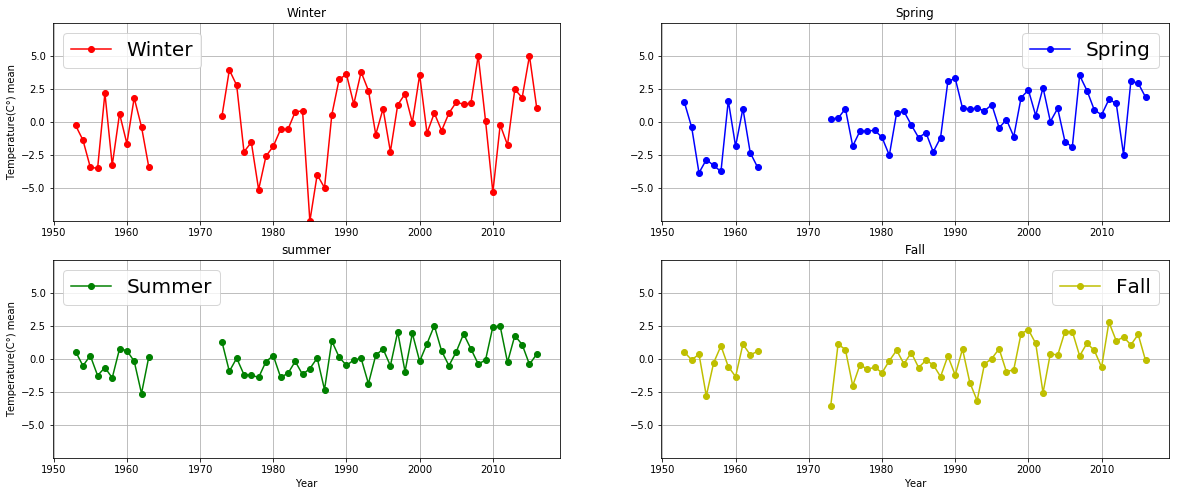

In [10]:
#size for the graph
plt.rcParams['figure.figsize'] = [20,8]

#Figure with 2 rows, 2 columns and plot in the pos 1
plt.subplot(2,2,1)
#print the graph, where the first parameter is the x-axis and the second y-axis, then color,typeline, and label
plt.plot(winter_agg['year'].astype(int), winter_agg['Diff'],'ro-' ,label='Winter')
#to plot the label-i.e, the symbology
plt.legend(loc='upper left', prop = {'size':20})
#tag of y label
plt.ylabel('Temperature(C°) mean')
#using the scale to y-axis
plt.yticks([-5,-2.5,0,2.5,5])
#limiting the y-axis
plt.ylim([-7.5,7.5])
#plotting the title
plt.title('Winter')
plt.grid()

#Figure with 2 rows, 2 columns and plot in the pos 2
plt.subplot(2,2,2)
#print the graph, where the first parameter is the x-axis and the second y-axis, then color,typeline, and label
plt.plot(spring_agg['year'].astype(int), spring_agg['Diff'],'bo-', label='Spring')
#to plot the label-i.e, the symbology
plt.legend(loc='upper right', prop = {'size':20})
#plotting title
plt.title('Spring')
#scaling the y-axis
plt.yticks([-5,-2.5,0,2.5,5])
#limiting y-axiss
plt.ylim([-7.5,7.5])
plt.grid()

#Figure with 2 rows, 2 columns and plot in the pos 3
plt.subplot(2,2,3)
#print the graph, where the first parameter is the x-axis and the second y-axis, then color,typeline, and label
plt.plot(summer_agg['year'].astype(int), summer_agg['Diff'],'go-', label='Summer')
#to plot the label-i.e, the symbology
plt.legend(loc='upper left', prop = {'size':20})
#plotting title
plt.title("summer")
#naming and plotting x-axis
plt.xlabel('Year')
#naming and plotting y.axis
plt.ylabel('Temperature(C°) mean')
#scaling y-axis
plt.yticks([-5,-2.5,0,2.5,5])
#limiting y-axis
plt.ylim([-7.5,7.5])
plt.grid()

#Figure with 2 rows, 2 columns and plot in the pos 4
plt.subplot(2,2,4)
#print the graph, where the first parameter is the x-axis and the second y-axis, then color,typeline, and label
plt.plot(fall_agg['year'].astype(int), fall_agg['Diff'], 'yo-', label='Fall')
#to plot the label-i.e, the symbology
plt.legend(loc='upper right', prop = {'size':20})
#plotting title
plt.title("Fall")
#naming and plotting x-axis
plt.xlabel('Year')
#scaling the y-axis
plt.yticks([-5,-2.5,0,2.5,5])
#limiting y-axis
plt.ylim([-7.5,7.5])
plt.grid()
